In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

RangeIndex(start=0, stop=0, step=1)


In [8]:
# Load the data
data = pd.read_excel("C:/Users/Aakash/Desktop/SCMA/pinksheet.xlsx",skiprows=6, sheet_name='Monthly Prices')
print(data.columns)

Index(['Unnamed: 0', 'CRUDE_PETRO', 'CRUDE_BRENT', 'CRUDE_DUBAI', 'CRUDE_WTI',
       'COAL_AUS', 'COAL_SAFRICA', 'NGAS_US', 'NGAS_EUR', 'NGAS_JP', 'iNATGAS',
       'COCOA', 'COFFEE_ARABIC', 'COFFEE_ROBUS', 'TEA_AVG', 'TEA_COLOMBO',
       'TEA_KOLKATA', 'TEA_MOMBASA', 'COCONUT_OIL', 'GRNUT', 'FISH_MEAL',
       'GRNUT_OIL', 'PALM_OIL', 'PLMKRNL_OIL', 'SOYBEANS', 'SOYBEAN_OIL',
       'SOYBEAN_MEAL', 'RAPESEED_OIL', 'SUNFLOWER_OIL', 'BARLEY', 'MAIZE',
       'SORGHUM', 'RICE_05', 'RICE_25', 'RICE_A1', 'RICE_05_VNM',
       'WHEAT_US_SRW', 'WHEAT_US_HRW', 'BANANA_EU', 'BANANA_US', 'ORANGE',
       'BEEF', 'CHICKEN', 'LAMB', 'SHRIMP_MEX', 'SUGAR_EU', 'SUGAR_US',
       'SUGAR_WLD', 'TOBAC_US', 'LOGS_CMR', 'LOGS_MYS', 'SAWNWD_CMR',
       'SAWNWD_MYS', 'PLYWOOD', 'COTTON_A_INDX', 'RUBBER_TSR20',
       'RUBBER1_MYSG', 'PHOSROCK', 'DAP', 'TSP', 'UREA_EE_BULK', 'POTASH',
       'ALUMINUM', 'IRON_ORE', 'COPPER', 'LEAD', 'Tin', 'NICKEL', 'Zinc',
       'GOLD', 'PLATINUM', 'SILVER'],
      dt

In [10]:
data.head()

,Unnamed: 0,CRUDE_PETRO,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,COAL_AUS,COAL_SAFRICA,NGAS_US,NGAS_EUR,NGAS_JP,...,ALUMINUM,IRON_ORE,COPPER,LEAD,Tin,NICKEL,Zinc,GOLD,PLATINUM,SILVER
0,1960M01,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,715.40,206.1,2180.4,1631.0,260.8,35.27,83.5,0.9137
1,1960M02,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,728.19,203.7,2180.4,1631.0,244.9,35.27,83.5,0.9137
2,1960M03,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,684.94,210.3,2173.8,1631.0,248.7,35.27,83.5,0.9137
3,1960M04,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,723.11,213.6,2178.2,1631.0,254.6,35.27,83.5,0.9137
4,1960M05,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,684.75,213.4,2162.7,1631.0,253.8,35.27,83.5,0.9137


In [13]:
# Rename the first unnamed column to 'Date'
data.rename(columns={data.columns[0]: 'Date'}, inplace=True)

In [14]:
# Convert the 'Date' column to date format
data['Date'] = pd.to_datetime(data['Date'].astype(str), format='%YM%m')

In [15]:
data.set_index("Date", inplace=True)

In [17]:
data.head()

,CRUDE_PETRO,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,COAL_AUS,COAL_SAFRICA,NGAS_US,NGAS_EUR,NGAS_JP,iNATGAS,...,ALUMINUM,IRON_ORE,COPPER,LEAD,Tin,NICKEL,Zinc,GOLD,PLATINUM,SILVER
Date,,,,,,,,,,,,,,,,,,,,,
1960-01-01,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,…,...,511.471832,11.42,715.40,206.1,2180.4,1631.0,260.8,35.27,83.5,0.9137
1960-02-01,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,…,...,511.471832,11.42,728.19,203.7,2180.4,1631.0,244.9,35.27,83.5,0.9137
1960-03-01,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,…,...,511.471832,11.42,684.94,210.3,2173.8,1631.0,248.7,35.27,83.5,0.9137
1960-04-01,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,…,...,511.471832,11.42,723.11,213.6,2178.2,1631.0,254.6,35.27,83.5,0.9137
1960-05-01,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,…,...,511.471832,11.42,684.75,213.4,2162.7,1631.0,253.8,35.27,83.5,0.9137


In [18]:
# Extract gold prices
gold_prices = data['GOLD']

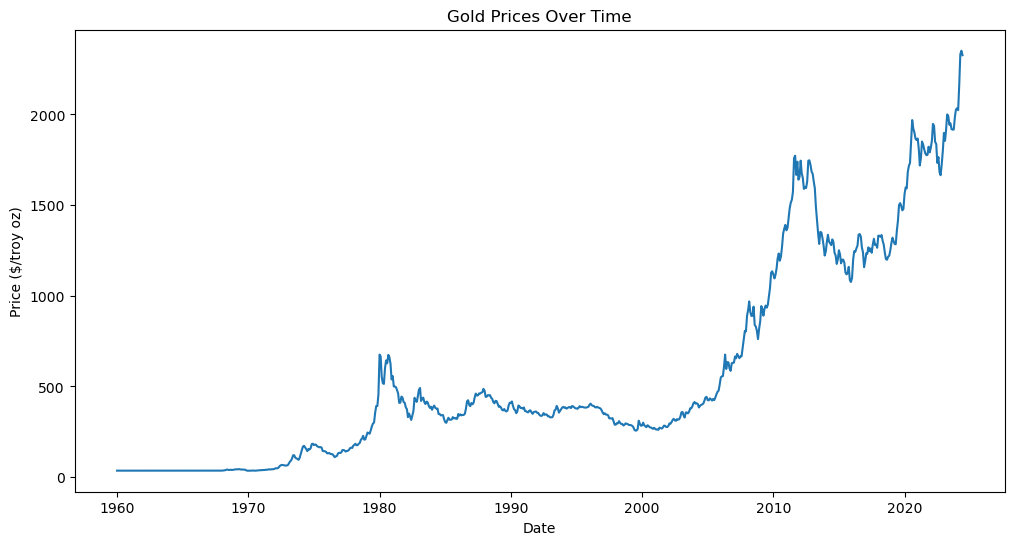

In [19]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(gold_prices)
plt.title('Gold Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($/troy oz)')
plt.show()

# SARIMA MODEL

In [20]:
# Split the data into training and test sets
train_size = int(len(gold_prices) * 0.8)
train, test = gold_prices[:train_size], gold_prices[train_size:]

In [21]:
# SARIMA Model
sarima_model = SARIMAX(train, 
                       order=(1, 1, 1),  # p, d, q
                       seasonal_order=(1, 1, 1, 12))  # P, D, Q, S (monthly seasonality)
sarima_result = sarima_model.fit()

C:\Users\Aakash\mlproject\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Aakash\mlproject\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [22]:
# Forecasting with SARIMA
sarima_forecast = sarima_result.get_forecast(steps=len(test))
sarima_forecast_mean = sarima_forecast.predicted_mean
sarima_conf_int = sarima_forecast.conf_int()

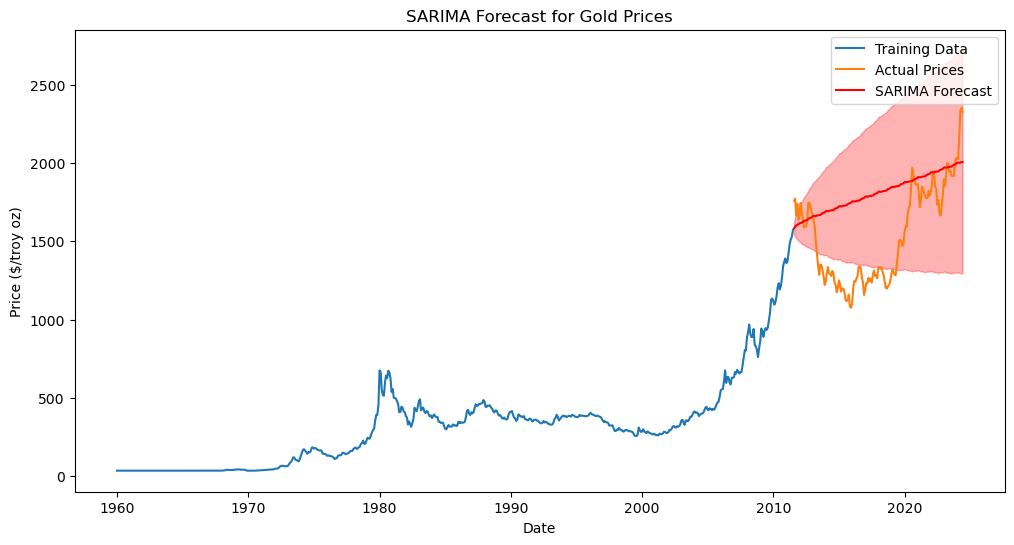

In [23]:
# Plot SARIMA Forecast
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test.index, test, label='Actual Prices')
plt.plot(test.index, sarima_forecast_mean, label='SARIMA Forecast', color='red')
plt.fill_between(test.index, sarima_conf_int.iloc[:, 0], sarima_conf_int.iloc[:, 1], color='red', alpha=0.3)
plt.title('SARIMA Forecast for Gold Prices')
plt.xlabel('Date')
plt.ylabel('Price ($/troy oz)')
plt.legend()
plt.show()

# LSTM Model

In [24]:
# Scaling data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train.values.reshape(-1, 1))
scaled_test = scaler.transform(test.values.reshape(-1, 1))

In [25]:
# Prepare data for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X_train, y_train = create_dataset(scaled_train, time_step)
X_test, y_test = create_dataset(scaled_test, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [26]:
# Build LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\Aakash\mlproject\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0285
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0032
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0010   
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0012
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.8594e-04
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0011
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.0249e-04
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.2866e-04
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.3616e-04
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.3097e-04
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.6534e-04
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.2541e-04
Epoch 13/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.7332e-04
Epoch 14/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0011
Epoch 15/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [28]:
# Forecasting with LSTM
lstm_forecast = model.predict(X_test)
lstm_forecast = scaler.inverse_transform(lstm_forecast)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step


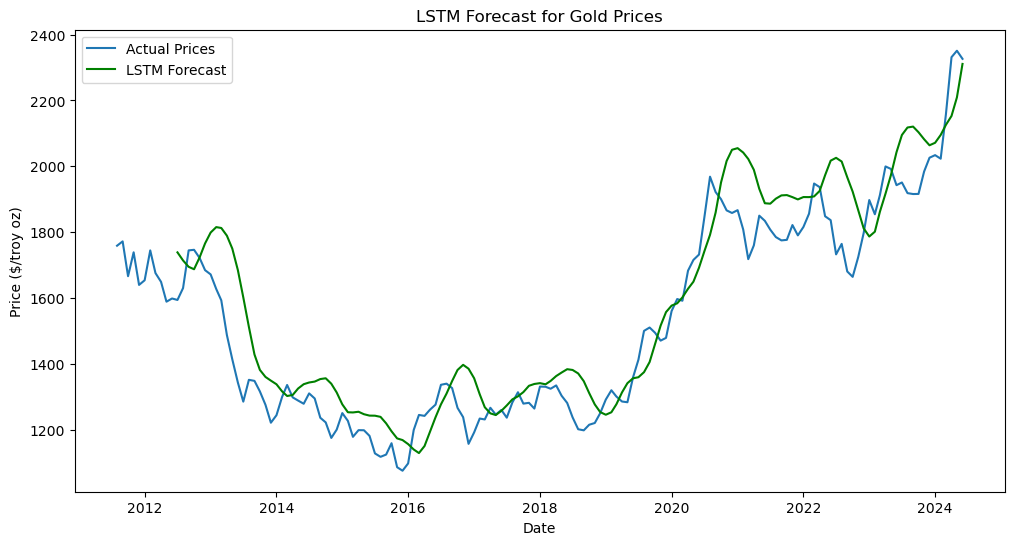

In [29]:
# Plot LSTM Forecast
plt.figure(figsize=(12, 6))
plt.plot(gold_prices.index[train_size:], test, label='Actual Prices')
plt.plot(gold_prices.index[train_size + time_step + 1:], lstm_forecast, label='LSTM Forecast', color='green')
plt.title('LSTM Forecast for Gold Prices')
plt.xlabel('Date')
plt.ylabel('Price ($/troy oz)')
plt.legend()
plt.show()